<a href="https://colab.research.google.com/github/KartikayBhardwaj-dev/Ai_lab/blob/main/ai_lab_week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

preprocessing of image

#Imports

In [ ]:
 import os
 import numpy as np
 import torch
 import torchvision
 import torchvision.transforms as transforms
 from torchvision.transforms import v2
 import tensorflow as tf
 import tensorflow_datasets as tfds
 import matplotlib.image as mpimg
 import cv2
 from PIL import Image
 import skimage
 from skimage import data
 from skimage import transform
 import matplotlib.pyplot as plt
 print(f"PyTorch version {torch.__version__}")
 print(f"Tensorflow Version {tf.__version__}")

PyTorch version 2.8.0+cu126
Tensorflow Version 2.19.0


#Data (example images)

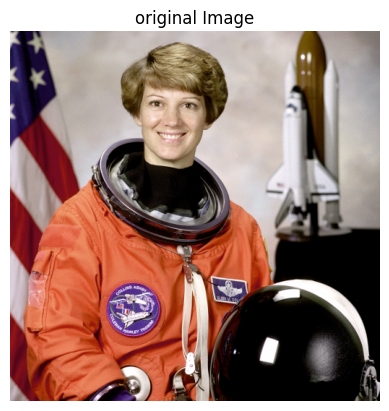

original image shape : (512, 512, 3), it has 3 channels: **RBG**


In [ ]:
#Reading an image
original_image = data.astronaut()
plt.title("original Image")
plt.imshow(original_image)
plt.axis("off")
plt.show()
#checking th shape
print(f"original image shape : {original_image.shape}, it has 3 channels: **RBG**")

#Reshaping the image

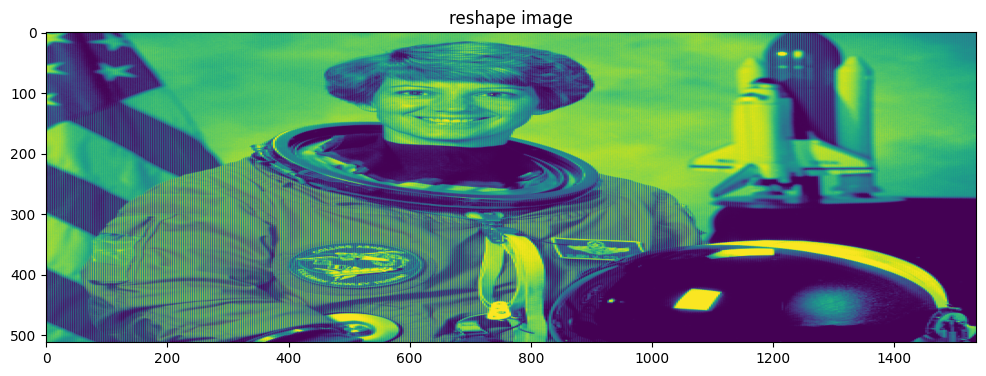

In [ ]:
#merging the channels with width, in result RBG info will be blurred and image become grayscale
#width_old = 512, width_new = 512 * 3 =
reshaped_image = original_image.reshape(original_image.shape[0], -1)
plt.figure(figsize=(12, 12))
plt.title("reshape image")
plt.imshow(reshaped_image)

#Resize
- using skimage
- using open cv
- using pillow (PIL) it uses numpy array

CV2

Resized Image shape (100, 200, 3)


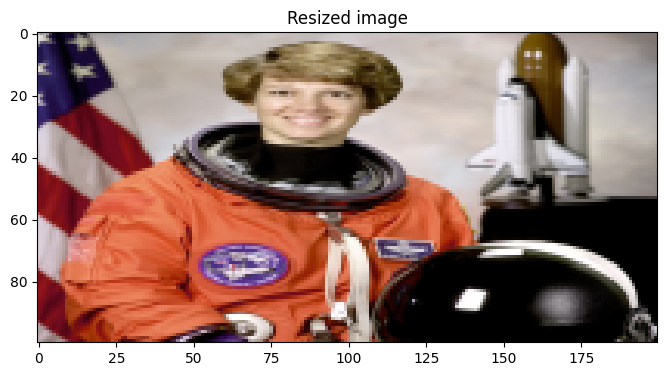

In [ ]:
new_width = 200
new_heigth = 100
new_dimension = (new_width, new_heigth)
resized_image = cv2.resize(original_image, new_dimension, interpolation=cv2.INTER_AREA)

print("Resized Image shape", resized_image.shape)
plt.figure(figsize=(8,8))
plt.title("Resized image")
plt.imshow(resized_image)

Pillow

Resized image shape (100, 200, 3)


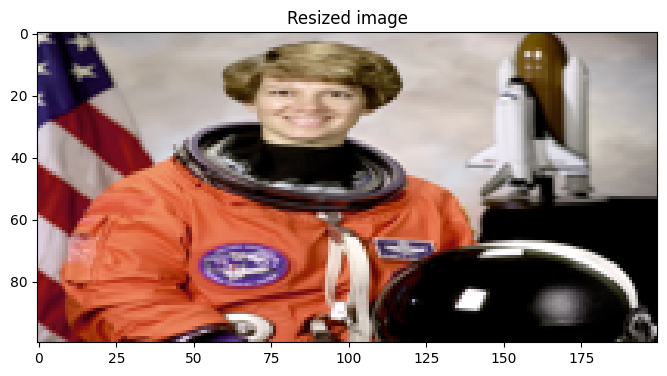

In [ ]:
numpy_image = Image.fromarray(original_image)
resized_pil_image = numpy_image.resize((200, 100))
resized_image = np.array(resized_pil_image)

print(f"Resized image shape {resized_image.shape}")

plt.figure(figsize=(8,8))
plt.title("Resized image")
plt.imshow(resized_image)

Skimage

(100, 300, 3)


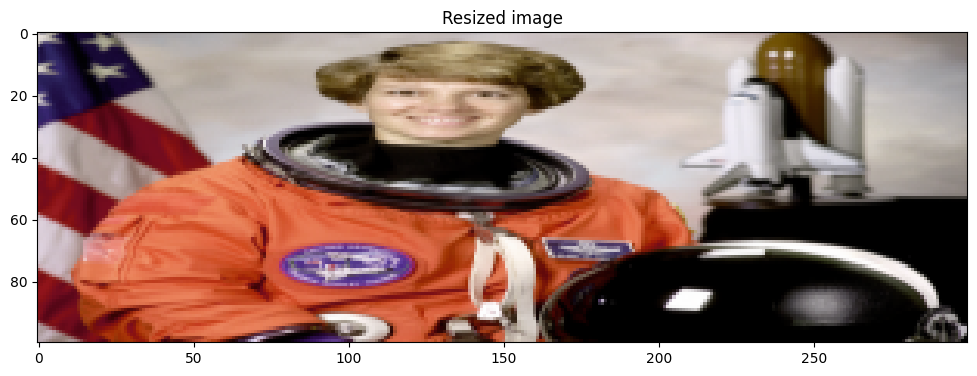

In [ ]:
image_resized = skimage.transform.resize(original_image, (100, 300))
print(image_resized.shape)
plt.figure(figsize=(12, 12))
plt.title("Resized image")
plt.imshow(image_resized)

#Image Preprocessing with pytorch

In [ ]:
#convert image pixels to tensors
img_tensors = v2.ToImage()(original_image)

#pipeline for preprocessing with v2 module
pytorch_v2_pipeline = v2.Compose([
    #converting tensor to unit8 datatype
    v2.ToDtype(torch.uint8, scale=True),

    #Randomising the Resizing/crop for image tensors
    v2.RandomResizedCrop(size=(224, 224), antialias=True),

    #Random Horizontal filp
    v2.RandomHorizontalFlip(p=0.5),
    #convert to float
    v2.ToDtype(torch.float32, scale=True),

    #Normalize
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
#apply transformer

preprocessed_image = pytorch_v2_pipeline(img_tensors)

print(preprocessed_image.shape)

torch.Size([3, 224, 224])


displaying preprocessed image by denormalising the img_tensors


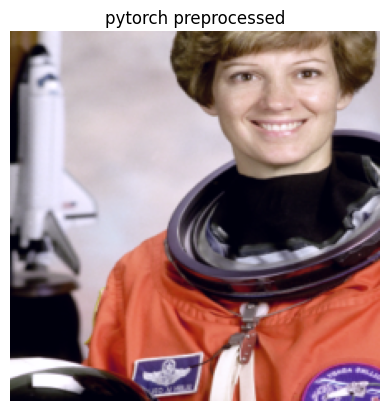

it will give different parts of images randomly because in pipeline we have crop as random


In [ ]:
mean = torch.tensor([0.485, 0.456, 0.456]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
display_image = preprocessed_image * std + mean
display_image = display_image.clamp(0, 1)
plt.figure()
plt.imshow(display_image.permute(1, 2, 0).numpy())
plt.title("pytorch preprocessed")
plt.axis("off")
plt.show()

print("it will give different parts of images randomly because in pipeline we have crop as random")

#Image preprocessing with tensorflow
- using tf module

(224, 224, 3)


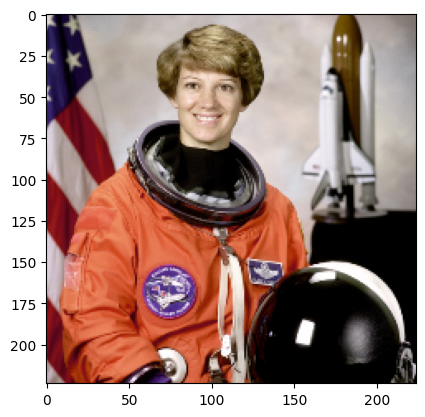

In [ ]:
#pil image to tensorflow
raw_tf_image = tf.convert_to_tensor(np.array(original_image), dtype=tf.float32)
#add a batch dimensions becuase tf expects (Batch, width, height, channels)
raw_tf_image1 = tf.expand_dims(raw_tf_image, 0)

#dont have pipeline so doing everything manually
#1. resize
resized_tf_image = tf.image.resize(raw_tf_image1, [224, 224])

#2. normalize pixels from 0 to 1
normalized_tf_image = resized_tf_image/255.0

#3. normalize pixels from -1 to 1
normalized_tf_image_02 = (normalized_tf_image * 2.0) - 1.0

#4. for display, we will use 0 - 1 normalized images
preprocessed_tf_image = normalized_tf_image[0]
print(preprocessed_tf_image.shape)


plt.figure()
plt.imshow(preprocessed_tf_image.numpy())
plt.show()
